## Intro to PyTorch
https://www.youtube.com/watch?v=NokwvS3eMk4&list=WL&index=1&t=72s

In [68]:
!pip install -q torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 44.8 MB/s eta 0:00:00


In [71]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchmetrics import Accuracy
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_moons
from collections import Counter
from tqdm.notebook import tqdm

In [ ]:
!pip install torch torchvision

In [3]:
vec = np.array([9, 7, 5])

In [4]:
vec

array([9, 7, 5])

In [5]:
vec.shape

(3,)

In [6]:
vec_tensor = torch.from_numpy(vec)

In [7]:
vec_tensor

tensor([9, 7, 5])

In [8]:
vec_tensor.shape

torch.Size([3])

In [9]:
vec_tensor -= vec_tensor

In [10]:
vec_tensor

tensor([0, 0, 0])

In [11]:
vec

array([0, 0, 0])

In [12]:
matrix = np.array([[1, 2, 3], [4, 5, 6]])

In [13]:
matrix

array([[1, 2, 3],
       [4, 5, 6]])

In [15]:
matrix_tensor = torch.from_numpy(matrix)
matrix_tensor

tensor([[1, 2, 3],
        [4, 5, 6]])

## Tensors data types

In [17]:
torch.rand(3, 224, 224).shape

torch.Size([3, 224, 224])

In [19]:
torch.tensor(np.array([1, 2, 2.5, 3])).dtype

torch.float64

In [26]:
print(
    torch.FloatTensor().dtype, # primary choise
    torch.HalfTensor().dtype,
    torch.DoubleTensor().dtype,
    torch.LongTensor().dtype,
    torch.IntTensor().dtype,
    torch.ShortTensor().dtype,
    torch.CharTensor().dtype,
    torch.BoolTensor().dtype, sep='\n'
)

torch.float32
torch.float16
torch.float64
torch.int64
torch.int32
torch.int16
torch.int8
torch.bool


In [27]:
print(
    torch.IntTensor().dtype,
    torch.LongTensor().dtype,
    torch.ShortTensor().dtype,
    torch.CharTensor().dtype,
    torch.BoolTensor().dtype, sep='\n'
)

torch.int32
torch.int64
torch.int16
torch.int8
torch.bool


In [32]:
matrix_tensor = matrix_tensor.type_as(torch.FloatTensor())
matrix_tensor

tensor([[1., 2., 3.],
        [4., 5., 6.]])

## Random tenzor

In [33]:
torch.FloatTensor(42)

tensor([3.3919e-08, 4.4392e-41, 5.8061e+35, 3.0753e-41, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.8077e-43, 0.0000e+00, 5.8741e+35, 3.0753e-41])

In [44]:
tensor_ = [0, 1, 2, 3]
tensor_ = torch.FloatTensor(tensor_)
tensor_

tensor([0., 1., 2., 3.])

In [46]:
torch.ones(3,2)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [48]:
torch.zeros(3,4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [49]:
x = torch.randn((4,2,4))
x

tensor([[[-2.4025, -1.7823, -0.4699, -1.0767],
         [ 0.3717,  0.8156,  0.8884,  1.6466]],

        [[-0.4226, -0.5099, -0.2153, -1.4356],
         [-2.2340,  1.3360, -0.0633,  1.1256]],

        [[ 1.0167, -0.9660,  0.9380,  0.5144],
         [ 0.9176, -1.1640,  0.5717, -0.2708]],

        [[-0.2423,  0.9289, -2.6904,  1.6267],
         [ 0.4690,  0.6482, -0.9369,  0.2533]]])

In [51]:
# inplace
x.uniform_(0, 2)

tensor([[[1.4187, 0.6915, 1.1527, 1.1715],
         [1.7777, 1.5377, 0.7277, 0.1316]],

        [[1.1991, 1.6279, 0.0707, 1.1849],
         [0.8057, 1.7273, 1.9954, 0.4513]],

        [[1.5032, 0.2984, 1.4747, 0.7664],
         [1.4716, 1.6653, 0.5624, 1.2386]],

        [[1.9881, 0.2210, 0.1715, 0.7951],
         [0.2389, 1.2747, 1.2845, 1.8809]]])

In [52]:
x

tensor([[[1.4187, 0.6915, 1.1527, 1.1715],
         [1.7777, 1.5377, 0.7277, 0.1316]],

        [[1.1991, 1.6279, 0.0707, 1.1849],
         [0.8057, 1.7273, 1.9954, 0.4513]],

        [[1.5032, 0.2984, 1.4747, 0.7664],
         [1.4716, 1.6653, 0.5624, 1.2386]],

        [[1.9881, 0.2210, 0.1715, 0.7951],
         [0.2389, 1.2747, 1.2845, 1.8809]]])

## Tensors operations

In [58]:
x_ones = torch.ones(2,3)
x_ones

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [59]:
y_ones = torch.ones(2,3)
y_ones = - y_ones
y_ones

tensor([[-1., -1., -1.],
        [-1., -1., -1.]])

In [60]:
x_ones + y_ones

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [63]:
z = torch.rand(2,3)
z.uniform_(-2,2)
z

tensor([[-0.0750,  0.6059, -0.8315],
        [-1.9634, -0.0963,  1.0239]])

In [64]:
z > x_ones

tensor([[False, False, False],
        [False, False,  True]])

In [65]:
z < y_ones

tensor([[False, False, False],
        [ True, False, False]])

## Working with Dataset

In [72]:
x, y = make_moons(n_samples=1000, noise=0.15, random_state=42)

In [74]:
Counter(y)

Counter({1: 500, 0: 500})

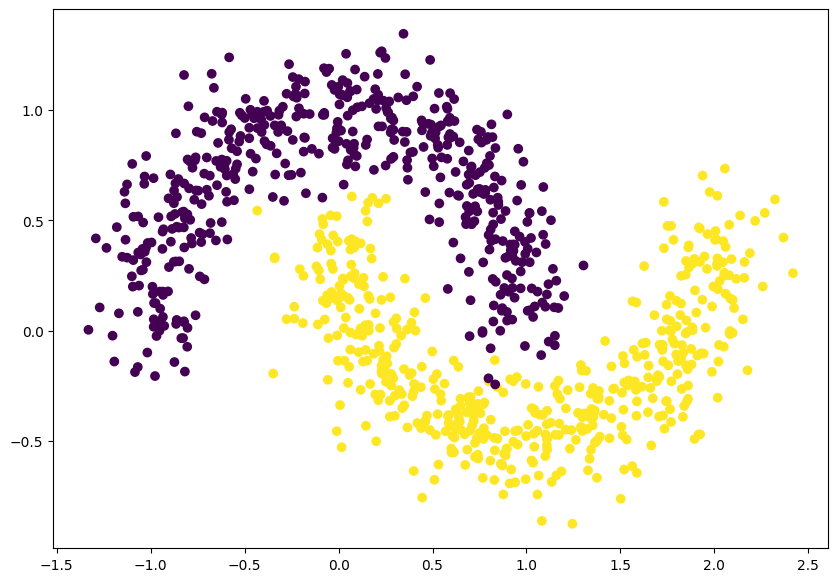

In [75]:
plt.figure(figsize=(10, 7))
plt.scatter(x[:, 0], x[:, 1], c=y)

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [84]:
x_train

array([[ 2.71506441e-02,  6.61659085e-01],
       [ 4.09580888e-01,  6.15068326e-04],
       [-4.75476257e-01,  9.18988139e-01],
       ...,
       [-8.33329381e-01,  5.36737747e-01],
       [ 1.10901769e+00,  1.64491850e-01],
       [ 1.93666470e+00,  1.40539722e-01]])

In [85]:
x_train = torch.from_numpy(x_train).type(torch.FloatTensor)
y_train = torch.from_numpy(y_train).type(torch.FloatTensor)

x_test = torch.from_numpy(x_test).type(torch.FloatTensor)
y_test = torch.from_numpy(y_test).type(torch.FloatTensor)

In [86]:
BATCH_SIZE = 32
train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [87]:
next(iter(train_loader))

[tensor([[ 0.0995,  1.0116],
         [ 0.2527,  0.5975],
         [ 1.3235, -0.4445],
         [-1.0244,  0.7911],
         [ 0.9921, -0.0690],
         [-0.8333,  0.5367],
         [ 1.1518, -0.0228],
         [ 0.0255,  0.2308],
         [-0.9773, -0.2050],
         [ 0.2594, -0.1480],
         [ 1.1483,  0.1061],
         [ 1.0359, -0.5975],
         [ 1.1083, -0.4230],
         [ 0.5882,  0.9459],
         [ 0.9636,  0.4265],
         [ 1.8005,  0.0201],
         [ 0.6072, -0.4762],
         [ 1.0418, -0.5249],
         [ 0.9565,  0.8239],
         [-0.0055,  0.1361],
         [ 0.9191, -0.6279],
         [ 0.5846,  0.8761],
         [ 0.3483, -0.1733],
         [ 1.8043, -0.1962],
         [ 1.1590, -0.6548],
         [-0.9514,  0.1775],
         [ 0.3665, -0.4376],
         [ 2.0473,  0.4059],
         [-0.5614,  0.7085],
         [ 0.1762,  0.3265],
         [ 1.6728, -0.3058],
         [ 1.8236,  0.2487]]),
 tensor([0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1